<p>
<h1><b><center></center></b></h1>
<center><img src="https://drive.google.com/uc?id=1UJc1ci41G6ahJ7ProKvunUOIBcTXZ6ZG" align="center" width="550"></center>
</p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 3</center></b><h2>
<h3><b><center>De la Tierra a los planetas</center></b><h3>
<h5><center><b>Asignada</b>: 7 de octubre de 2024</center><h5>
<h5><center><b>Entrega</b>: 28 de octubre de 2024</center><h5>

<hr>
<b>Nombre</b>: Simón Patiño
<br/>
<hr/>


## Enunciado

**Objetivo**: El objetivo de esta tarea es calcular las propiedades de un cohete por fases para llevar una carga útil científica hasta un planeta.

Para elegir el planeta tome el último dígito de la cédula y saque el módulo a 5 (digito % 5). Esto le dará un número entre 0 y 4. Con este número escoja su planeta así: 0: Mercurio, 1: Venus, 2: Marte, 3: Júpiter, 4: Saturno.

Ejemplo: si él último dígito de la cédula es 7, el módulo a 5 (residuo de la división por 5) es 7%5 = 2 y por lo tanto la misión deberá diseñarse a Júpiter. Si el dígito de la cédula es 4, 4%5 = 4, deberá diseñar la misión a Saturno.


**Procedimiento**:

Una agencia espacial planea enviar una carga útil científica con una masa de 134 kg hasta un planeta. Para ello debe encontrar la fecha óptima de lanzamiento y calcular la cantidad total de combustible necesaria para realizar la misión.

Para este propósito se planea usar un cohete de 3 etapas en tandem que tienen motores con impulsos específicos de 400, 350 y 300 s respectivamente. Los coeficientes estructurales de las tres etapas ($\epsilon$) son 0.08, 0.09 y 0.12 respectivamente.

1. Calcular la primera fecha de lanzamiento y de llegada óptima después del 2030-01-01, es decir aquella que minimice la energía $C_3$. Para la fecha de lanzamiento elegida, calcular: La velocidad que necesita conseguir la nave para insertarse en la órbita de transferencia y El cambio de velocidad requerido para insertar en órbita alrededor del planeta destino.

2. Usando la velocidad calculada en 1, calcule la velocidad que debe alcanzar el vehículo en órbita para llegar, una vez muy lejos de la Tierra, hasta la velocidad requerida para la transferencia.

  **NOTA**: Tenga en cuenta que la rotación de la Tierra aporta un $\Delta v$ que se puede sumar al conseguido por la fase de propulsión del cohete. Calcule ese $\Delta v$ debido a la rotación de la Tierra. Asuma que el cohete se lanza desde el ecuador y en dirección vertical.

3. Es importante tener en cuenta que la carga útil final debe incluir el combustible necesario para hacer la maniobra de inserción en la órbita del planeta al que se dirige. Calcule la masa total de combustible requerida para esa maniobra de inserción y súmela a la masa de carga útil que desea lanzar. Asuma para esa última etapa un coeficiente de estructura $\epsilon = 0.1$.

4. Usando la velocidad calculada en 2, encuentre la cantidad de combustible y la masa total del cohete requerida para poner la carga útil en la órbita de transferencia.

5. **(Opcional)** Simule el perfil de vuelo del vehículo espacial diseñado, desde su lanzamiento en la Tierra hasta que la carga útil es puesta en una órbita de escape. Escoja libremente los parámetros del lanzamiento, incluyendo la altura de la *pitchover maneuver* y el ángulo de lanzamiento.

- **Atención**: En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

##*Punto 1*

In [ ]:
!pip install -Uq pymcel
import pymcel as pc
from pymcel.extra import solucion_lambert
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.optimize import fsolve
from scipy.integrate import odeint
print(pc.version)

0.6.11


##*Extracción de datos*

In [ ]:
mu = pc.constantes.G * pc.constantes.M_sun
direccion = 'pro'

fechas_salida = dict(start='2030-01-01',stop='2032-01-30',step='5d')
fechas_llegada = dict(start='2032-01-30',stop='2032-12-30',step='5d')

Xtierra, ts_salida, Xtierra_df = pc.consulta_spice(id='399', location='@0', epochs=fechas_salida)
Xmarte, ts_llegada, Xmarte_df = pc.consulta_spice(id='4', location='@0', epochs=fechas_llegada)

len(ts_salida), len(ts_llegada), len(ts_salida)*len(ts_llegada)

/usr/local/lib/python3.10/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


(153, 68, 10404)

In [ ]:
TDS, TAS = np.meshgrid(
    Time(ts_salida,format='jd').to_datetime(),
    Time(ts_llegada,format='jd').to_datetime(),
)
ts_salida[0], ts_llegada[0]

/usr/local/lib/python3.10/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 153 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/usr/local/lib/python3.10/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 68 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


(2462502.5, 2463261.5)

##*Diagrama de chuleta de cerdo*

/usr/local/lib/python3.10/dist-packages/pymcel/extra.py:122: RuntimeWarning: overflow encountered in sinh
  return (np.sinh(np.sqrt(-z)) - np.sqrt(-z)) / (np.sqrt(-z)) ** 3
/usr/local/lib/python3.10/dist-packages/pymcel/extra.py:111: RuntimeWarning: overflow encountered in cosh
  return (np.cosh(np.sqrt(-z)) - 1) / (-z)
/usr/local/lib/python3.10/dist-packages/pymcel/extra.py:40: RuntimeWarning: invalid value encountered in scalar divide
  return r1 + r2 + A * (z * S(z) - 1) / np.sqrt(C(z))


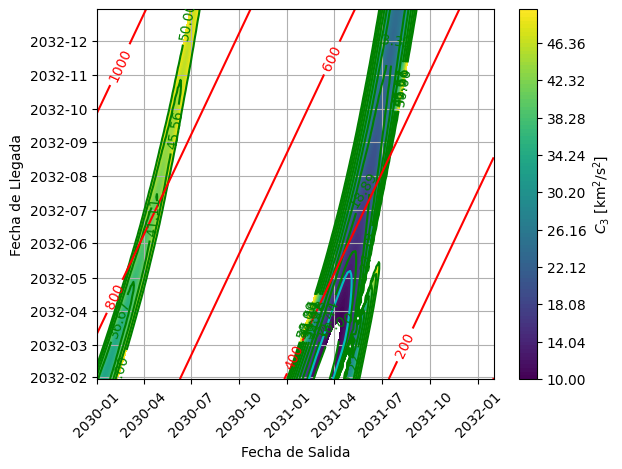

In [ ]:
C3s = np.zeros((len(ts_llegada),len(ts_salida)))
TFs = np.zeros((len(ts_llegada),len(ts_salida)))
#This line is for save velocity of arrive
v2s = np.zeros((len(ts_llegada),len(ts_salida)))
for id,td in enumerate(ts_salida):
  for ia,ta in enumerate(ts_llegada):
    tf = (ta - td)*86400 # s
    P1 = Xtierra[id,:3]
    P2 = Xmarte[ia,:3]
    TFs[ia, id] = tf
    try:
      v1, v2, orbita = solucion_lambert(P1, P2, tf, mu=mu, direccion=direccion)
      vinf_vec = Xtierra[id,3:] - v1

    except:
      vinf_vec = 1000000*np.ones(3)
    C3s[ia, id] = np.linalg.norm(vinf_vec/1e3)**2
    v2s[ia, id] = np.linalg.norm(v2)/1e3

c = plt.contourf(TDS, TAS, C3s, levels=np.linspace(10,50,100))
cbar = plt.colorbar(c)
cbar.set_label(r'$C_3$ [km$^2$/s$^2$]')

c = plt.contour(TDS, TAS, C3s, levels=np.linspace(10,50,10),colors='g')
plt.clabel(c, inline=True, fontsize=10)

c = plt.contour(TDS, TAS, TFs/86400, levels=5,colors='r')
plt.clabel(c, inline=True, fontsize=10)

plt.contour(TDS, TAS, C3s, levels=[13], colors='c')

plt.xlabel('Fecha de Salida')
plt.ylabel('Fecha de Llegada')

plt.xticks(rotation=45)
plt.grid()

##*Extracción del índice del menor $\ $  $C_3$*

In [ ]:
ij_min = np.unravel_index(C3s.argmin(), C3s.shape)

ij_min #(ia_min, id_min)

(0, 86)

##*Mejor fecha de salida y fecha de llegada*

In [ ]:
ia_min = ij_min[0]
id_min = ij_min[1]

bestDayExit = ts_salida[id_min]
bestDayArrive = ts_llegada[ia_min]

Time(bestDayExit,format='jd').to_datetime(), Time(bestDayArrive,format='jd').to_datetime(),

print("Fecha de salida:" , Time(bestDayExit,format='jd').to_datetime())
print("Fecha de llegada:" , Time(bestDayArrive,format='jd').to_datetime())

Fecha de salida: 2031-03-07 00:00:00
Fecha de llegada: 2032-01-30 00:00:00


/usr/local/lib/python3.10/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


March 7, 2031 at midnight (00:00:00).

January 30, 2032 at midnight (00:00:00).

##*10.8 meses de viaje*

##*Velocidad  $V_{∞}$*

In [ ]:
vinf_exit = np.sqrt(C3s.min())

print(vinf_exit, "km/s")

2.8540942481656018 km/s


##*Velocidad de inserción (acoplarse a la órbita de Marte)*

$$
\Delta V_{inserción} = V_{marte} - V_{spaceship\ arrive}
$$

In [ ]:
#Velocity of mars at moment of arrive

v_marte_vec = Xmarte[ ia_min, 3:]

v_marte = np.linalg.norm(v_marte_vec)

print("Velocity of Mars at moment of arrive: " , v_marte/1e3, "km/s")

#Velociy of spaceship at moment of arrive

v_spaceship = v2s[ia_min, id_min]

print("Velocity of spaceship at moment of arrive: " ,v_spaceship, "km/s")

#Delta V to enter a Mars orbit

delta_v_i = v_marte/1e3 - v_spaceship


print( "Delta V inserción: ",  delta_v_i , "km/s" )

Velocity of Mars at moment of arrive:  25.843119436977915 km/s
Velocity of spaceship at moment of arrive:  23.217987563400463 km/s
Delta V inserción:  2.625131873577452 km/s


----

##*Punto 2*

###*Igualando energias antes y despues de salir de la esfera de influencia de la tierra:*

$$
\frac{1}{2} V_{∞}^2 = \frac{1}{2}V^2 - \frac{\mu}{R_e}
$$

###*Donde*

$$
\Delta V= \Delta V_{Cohete} + \Delta V_{rot}
$$

\\

###*Entonces tenemos que:*

$$
V_{∞}^2 = ( \Delta V_{Cohete} + V_{rot})^2 - 2V_{circular}^2
$$

In [ ]:
#Delta V rotacional = Re x w_tierra

delta_v_earth = pc.constantes.R_earth * 7.27e-5 # m/s

delta_v_earth = delta_v_earth/1e3 # km/s

delta_v_earth

print( "Delta V rot: ", delta_v_earth, "km/s" )

Delta V rot:  0.46368787000000006 km/s


In [ ]:
#velocidad circular

mu_e = pc.constantes.G * pc.constantes.M_earth

v_circle = np.sqrt(mu_e/pc.constantes.R_earth)/1e3

print( "Velocity circular: ", v_circle, "km/s" )

Velocity circular:  7.905388234385281 km/s


##*Con todas las variables conocidas, finalmente es posible despejar $\Delta V_{cohete}$*

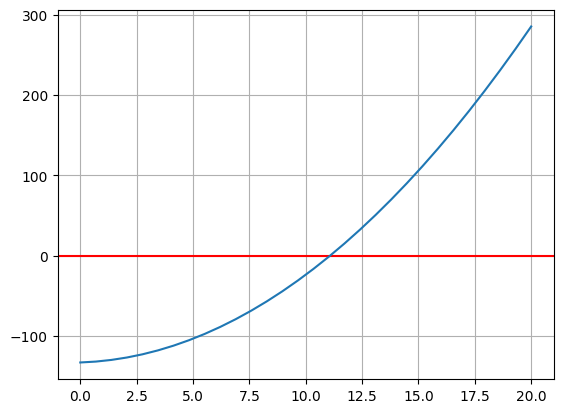

In [ ]:
def deltav_cohete(delta_v_cohete):
  return (delta_v_cohete + delta_v_earth)**2 - 2*(v_circle**2) - vinf_exit**2

velocidades = np.linspace(0,20,30)

soluciones = deltav_cohete(velocidades)

plt.grid()
plt.axhline(y=0, color='r', linestyle='-')
plt.plot(velocidades, soluciones)

In [ ]:
delta_v_cohete = fsolve(deltav_cohete, 10)[0]

print( "Delta V cohete: ", delta_v_cohete, "km/s" )

Delta V cohete:  11.074777376735653 km/s


##$\Delta V_{cohete} = 11.07 \ km/s$

##*Punto 3*

##*Para el *cuarto* stage* sabemos, $\epsilon = 0.1$, $m_{PL} = 134kg$ y $I_{sp} = 400s$



$$
0.1 =  \frac{m_e}{m_e + m_p}\\
$$
\
$$
m_p = 9 m_e
$$

##*Ahora:*

$$
\Delta V_{inserción} = C_4 \ln \left( \frac{1 + \lambda}{ 0.1 + \lambda} \right)
$$

In [ ]:
#Rocket parameters

mpl = 134 #kg

Isp1 = 400
Isp2 = 350
Isp3 = 300
Isp4 = 400

e1 = 0.08
e2 = 0.09
e3 = 0.12
e4 = 0.10

c1 = Isp1 * 9.81 /1e3
c2 = Isp2 * 9.81 /1e3
c3 = Isp3 * 9.81 /1e3
c4 = Isp4 * 9.81 /1e3

print("c1 = ", c1 , "km/s")
print("c2 = ", c2 , "km/s")
print("c3 = ", c3 , "km/s")
print("c4 = ", c4 , "km/s")

c1 =  3.924 km/s
c2 =  3.4335 km/s
c3 =  2.943 km/s
c4 =  3.924 km/s


$$
\lambda = \frac{m_{PL}}{m_e + m_p}
$$

\\

$$
\Delta V_{inserción} = C_4 \ln \left( \frac{1 + \frac{m_{PL}}{m_e + m_p}}{ 0.1 + \frac{m_{PL}}{m_e + m_p}} \right)
$$

\\
$$
\Delta V_{inserción} = C_4 \ln \left( \frac{1 + \frac{m_{PL}}{10m_e }}{ 0.1 + \frac{m_{PL}}{10m_e}} \right)
$$



##*Hallamos $m_e$ de la cuarta stage*

<ipython-input-111-8662583ad2cc>:2: RuntimeWarning: divide by zero encountered in divide
  return c4*np.log((1+mpl/(10*me))/(0.1+mpl/(10*me))) - delta_v_i
<ipython-input-111-8662583ad2cc>:2: RuntimeWarning: invalid value encountered in divide
  return c4*np.log((1+mpl/(10*me))/(0.1+mpl/(10*me))) - delta_v_i


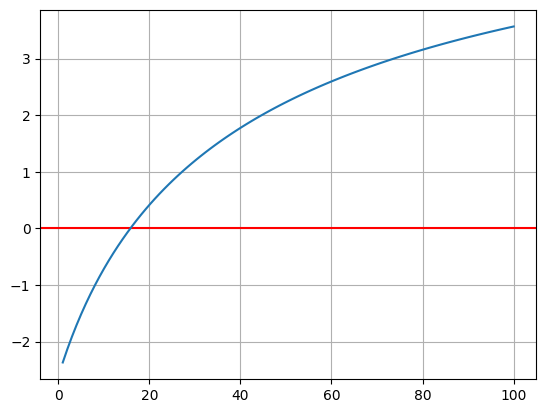

In [ ]:
def masa_estructural(me):
  return c4*np.log((1+mpl/(10*me))/(0.1+mpl/(10*me))) - delta_v_i

masas = np.linspace(0,100,100)

soluciones = masa_estructural(masas)

plt.grid()
plt.axhline(y=0, color='r', linestyle='-')
plt.plot(masas, soluciones)

In [ ]:
me = fsolve(masa_estructural, 13)[0]

mp = me*9

m_new_pl = mpl  + mp

print( "La masa estructural (4 stage) es: ", me, " kg")
print( "La masa del propellent es: ", mp, " kg")
print( "La nueva carga util es: ", m_new_pl, " kg")

La masa estructural (4 stage) es:  15.855960401816779  kg
La masa del propellent es:  142.703643616351  kg
La nueva carga util es:  276.703643616351  kg


##*Se necesitan 142.7036 kg extras de combustible para acoplarse a la orbita de Marte*

##*Punto 4*

##*De la formula de optimal staging, sabemos:*

$$
\Delta v_T-\sum_{i=1}^n c_i \ln \left[\frac{\eta c_i-1}{\eta c_i \varepsilon_i}\right]=0
$$

\

##*Relación de masas*

$$
n_i=\frac{\eta c_i-1}{\eta c_i \varepsilon_i}
$$

\

##*En nuestro caso, necesitamos que las tres primeras etapas alcancen el $\Delta V_{cohete}$*


$$
\Delta V_T = \Delta V_{cohete}
$$

<ipython-input-113-e12416abc557>:3: RuntimeWarning: invalid value encountered in log
  return delta_v_cohete -(c1*np.log((n*c1-1)/(n*c1*e1)) + c2*np.log((n*c2-1)/(n*c2*e2)) + c3*np.log((n*c3-1)/(n*c3*e3)))


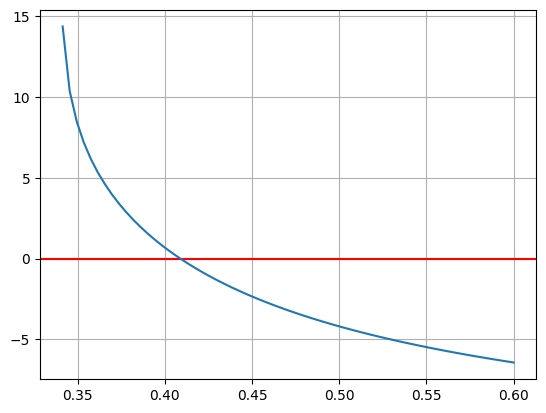

In [ ]:
def optimal_stage(n):

  return delta_v_cohete -(c1*np.log((n*c1-1)/(n*c1*e1)) + c2*np.log((n*c2-1)/(n*c2*e2)) + c3*np.log((n*c3-1)/(n*c3*e3)))

ns = np.linspace(0.2,0.6,100)

solutions = optimal_stage(ns)

plt.grid()
plt.axhline(y=0, color='r', linestyle='-')
plt.plot(ns, solutions)

#Busqueda de eta

In [ ]:
n = fsolve(optimal_stage,0.34)[0]

print( "El valor de n(eta) es: ", n)

El valor de n(eta) es:  0.40884143789508465


In [ ]:
n1 = (c1*n-1)/(c1*e1*n)
n2 = (c2*n-1)/(c2*e2*n)
n3 = (c3*n-1)/(c3*e3*n)

print( "El valor de n1 es: ", n1)
print( "El valor de n2 es: ", n2)
print( "El valor de n3 es: ", n3)

El valor de n1 es:  4.708409717673341
El valor de n2 es:  3.1958447925570446
El valor de n3 es:  1.4074753045985253


$$
\frac{m_{e,3} +  m_{p,3} + m_{PL,3}}{m_{e,3} + m_{PL,3}} = 4.7084
$$

\

$$
\frac{m_{e,2} +  m_{p,2} + m_{PL,2}}{m_{e,2} + m_{PL,2}} = 3.1958
$$

\

$$
\frac{m_{e,3} +  m_{p,3} + m_{PL,3}}{m_{e,3} + m_{PL,3}} = 1.4074
$$

###*Pero si definimos $$m_n = m_{e,n} + m_{p,n} $$*


\begin{gathered}
n_3=\frac{m_3+m_{PL}}{\varepsilon_3 m_3+m_{PL}}\\
\\
n_2=\frac{m_2+m_{3+}+m_{PL}}{\varepsilon_2 m_2+m_3+m_{PL}}  \\
\\
n_1=\frac{m_1+m_{2+}+m_3+m_{PL}}{\varepsilon_1 m_1+m_2+m_3+m_{PL}}
\end{gathered}

In [ ]:
def _n3(m):
  return (m + m_new_pl)/(e3*m + m_new_pl) -n3

m3 = fsolve(_n3,100)

def _n2(m):
  return (m + m3 + m_new_pl)/(e2*m + m3 + m_new_pl) -n2

m2 = fsolve(_n2,100)

def _n1(m):
  return (m + m2 + m3 + m_new_pl)/(e1*m + m2 + m3 + m_new_pl) -n1

m1 = fsolve(_n1,8000)

mo = m1 + m2 + m3 + m_new_pl



print(" la masa de la etapa tres (me + mp) es: ", m3, " kg")
print(" la masa de la etapa dos (me + mp) es: ", m2, " kg")
print(" la masa de la etapa uno (me + mp): ", m1, " kg")
print("\n")
print( "La masa total del cohete es: ", mo, " kg")

 la masa de la etapa tres (me + mp) es:  [135.6629761]  kg
 la masa de la etapa dos (me + mp) es:  [1271.09233963]  kg
 la masa de la etapa uno (me + mp):  [10015.53491957]  kg


La masa total del cohete es:  [11698.99387892]  kg


##*La masa del cohete es 11.69 toneladas*

##*Para calcular la masa del combustible:*

$$
\epsilon_i = \frac{m_{e,i}}{m_{e,i} + m_{p,i}}
$$


$$
\epsilon_i = \frac{m_{e,i}}{m_i}
$$

##*Donde $m_{p,i}$*

$$
m_{p,i} = \frac{m_{e,i} - \epsilon_i \cdot m_{e,i}}{\epsilon_i}
$$

In [ ]:
masa_estructural_stage_3 = e3*m3
masa_estructural_stage_2 = e2*m2
masa_estructural_stage_1 = e1*m1

masa_total_estructura = masa_estructural_stage_1 + masa_estructural_stage_2 + masa_estructural_stage_3

print( "La masa estructural de la etapa 3 es: ", masa_estructural_stage_3, " kg")
print( "La masa estructural de la etapa 2 es: ", masa_estructural_stage_2, " kg")
print( "La masa estructural de la etapa 1 es: ", masa_estructural_stage_1, " kg")


masa_combustible_stage_3 = (masa_estructural_stage_3 - e3*masa_estructural_stage_3)/e3
masa_combustible_stage_2 = (masa_estructural_stage_2 - e2*masa_estructural_stage_2)/e2
masa_combustible_stage_1 = (masa_estructural_stage_1 - e1*masa_estructural_stage_1)/e1


print("\n")

print( "La masa de combustible de la etapa 3 es: ", masa_combustible_stage_3, " kg")
print( "La masa de combustible de la etapa 2 es: ", masa_combustible_stage_2, " kg")
print( "La masa de combustible de la etapa 1 es: ", masa_combustible_stage_1, " kg")

masa_total_combustible = masa_combustible_stage_1 + masa_combustible_stage_2 + masa_combustible_stage_3

print("\n")

print( "La masa total de combustible es: ", masa_total_combustible, " kg")

print("\n")

print("El porcentaje de peso del cohete que es combustible: ", masa_total_combustible*100/mo , "%" )
print("El porcentaje de peso del cohete que es estructura:", masa_total_estructura*100/mo, "%")
print("El porcentaje de peso del cohete que es payload:", m_new_pl*100/mo, "%")

La masa estructural de la etapa 3 es:  [16.27955713]  kg
La masa estructural de la etapa 2 es:  [114.39831057]  kg
La masa estructural de la etapa 1 es:  [801.24279357]  kg


La masa de combustible de la etapa 3 es:  [119.38341897]  kg
La masa de combustible de la etapa 2 es:  [1156.69402906]  kg
La masa de combustible de la etapa 1 es:  [9214.29212601]  kg


La masa total de combustible es:  [10490.36957403]  kg


El porcentaje de peso del cohete que es combustible:  [89.66898934] %
El porcentaje de peso del cohete que es estructura: [7.96581886] %
El porcentaje de peso del cohete que es payload: [2.3651918] %


##*Punto 5:*

###*Vamos a realizar el perfil de vuelo del cohete simulando las 3 etapas principales. Además, vamos a suponer que justo cuando se acaba el combustible de una etapa, la otra empieza a funcionar al instante (no hay vuelo inercial)*

##*Perfil de vuelo: stage 1*

In [ ]:
#propiedades derivadas

T = 934e3 # N

mf1 = m1/n1
print(f'Masa en seco: {mf1} kg')

mb1 = m1 - mf1

print(f'Masa de combustible: {mb1} kg')

g0 = 9.81 # m/s^2

# Dado que T = b c
b1 = T/(c1*1e3)
print(f'Tasa de perdida de masa: {b1} kg/s')

# Tiempo de quemado
tbo1 = (m1 - mf1)/b1
print(f'Tiempo de quemado (burn-out): {tbo1} s = {tbo1/60} min')

Tmg1 = T/(m1*g0)
print(f'Razón empuje-peso: {Tmg1}')


# Valores en el burn-out
vbo1 = c1*1e3*np.log(m1/mf1) - g0*tbo1
hbo1 = c1*1e3/b1*(mf1*np.log(mf1/m1)+b1*tbo1)-1/2*g0*tbo1**2

# Pérdida por gravedad
delta_v_g1 = -g0*tbo1

vbo1, delta_v_g1, hbo1

print(f'Velocidad en el burn-out: {vbo1} m/s')
print(f'Delta V por gravedad: {delta_v_g1} m/s')
print(f'Altura en el burn-out: {hbo1} m')

Masa en seco: [2127.15874788] kg
Masa de combustible: [7888.37617169] kg
Tasa de perdida de masa: 238.02242609582058 kg/s
Tiempo de quemado (burn-out): [33.14131488] s = [0.55235525] min
Razón empuje-peso: [9.50612935]
Velocidad en el burn-out: [5754.53393078] m/s
Delta V por gravedad: [-325.11629897] m/s
Altura en el burn-out: [70326.5123756] m


###*Más propiedades (globales)*

In [ ]:
deg = np.pi/180

# Propiedades del cohete
CD = 0.5 # Coeficiente de arrastre
D = 5 # metros
A = np.pi*D**2/4 # Área transversal

# Propiedades de la Tierra y la atmósfera
RE = pc.constantes.R_earth
rho0 = 1.225 # kg/m^3
h0 = 7.5e3 # m

# Pithover meneauver
hpo = 130 #

In [ ]:
def ecuaciones_perfil_vuelo(Ys, t, tbos, mi , mf,):
  v, gamma, h, x = Ys

  # Cantidades auxiliares
  if t<=tbos:
    m = mi - b1*t
    Tt = T
  else:
    m = mf
    Tt = 0

  g = g0*RE**2/(RE+h)**2
  rho = rho0*np.exp(-h/h0)

  # Drag
  D = 1/2*rho*v**2*A*CD

  # Ecuaciones
  dvdt = Tt/m - D/m - g*np.sin(gamma)

  if h < hpo:
    dgammadt = 0
    gamma = 90*deg
  else:
    dgammadt = -1/v*(g - v**2/(RE+h))*np.cos(gamma)

  dhdt = v*np.sin(gamma)
  dxdt = v*np.cos(gamma)*RE/(RE+h)

  return [dvdt, dgammadt, dhdt, dxdt]

##*Grafica: stage 1*

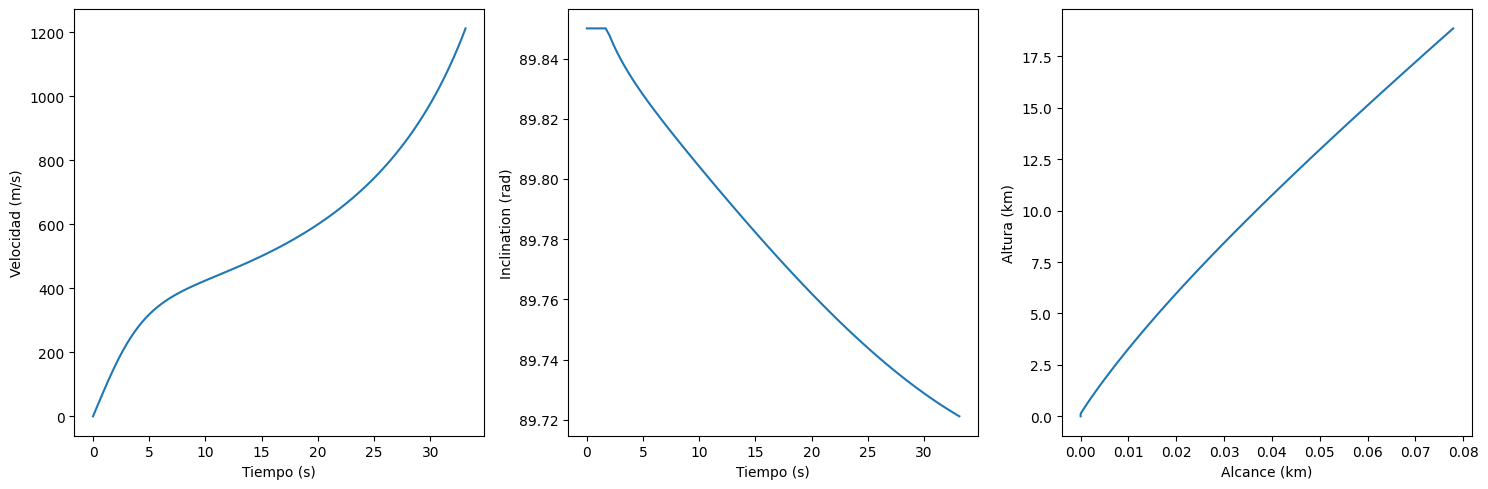

In [ ]:
Y0s = [0, 89.85*deg, 0, 0]
ts = np.linspace(0, 1*tbo1[0], 100)
rad = 180/np.pi

solucion = odeint(ecuaciones_perfil_vuelo, Y0s, ts, args=(tbo1[0], m1[0], mf1[0] ))

fig, axs = plt.subplots(1,3,figsize=(15,5))

ax = axs[0]
ax.plot(ts,solucion[:,0])
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad (m/s)')

ax = axs[1]
ax.plot(ts,solucion[:,1]*rad)
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Inclination (rad)')

ax = axs[2]
ax.plot(solucion[:,3]/1e3,solucion[:,2]/1e3)
ax.set_xlabel('Alcance (km)')
ax.set_ylabel('Altura (km)')

fig.tight_layout()

##*Grafica: stage 2*

In [ ]:
#propiedades derivadas

T = 934e3 # N

mf2 = m2/n2
print(f'Masa en seco: {mf2} kg')

mb2 = m2 - mf2

print(f'Masa de combustible: {mb2} kg')

g0 = 9.82 # m/s^2

# Dado que T = b c
b2 = T/(c2*1e3)
print(f'Tasa de perdida de masa: {b2} kg/s')

# Tiempo de quemado
tbo2 = (m2 - mf2)/b2
print(f'Tiempo de quemado (burn-out): {tbo2} s = {tbo2/60} min')

Tmg2 = T/(m2*g0)
print(f'Razón empuje-peso: {Tmg2}')


# Valores en el burn-out
vbo2 = c2*1e3*np.log(m2/mf2) - g0*tbo2
hbo2 = c2*1e3/b2*(mf2*np.log(mf2/m2)+b2*tbo2)-1/2*g0*tbo2**2

# Pérdida por gravedad
delta_v_g2 = -g0*tbo2

print(f'Velocidad en el burn-out: {vbo2} m/s')
print(f'Delta V por gravedad: {delta_v_g2} m/s')
print(f'Altura en el burn-out: {hbo2} m')

Masa en seco: [397.73281312] kg
Masa de combustible: [873.35952651] kg
Tasa de perdida de masa: 272.025629823795 kg/s
Tiempo de quemado (burn-out): [3.21057809] s = [0.05350963] min
Razón empuje-peso: [74.82699197]
Velocidad en el burn-out: [3957.68912377] m/s
Delta V por gravedad: [-31.52787683] m/s
Altura en el burn-out: [5140.21362477] m


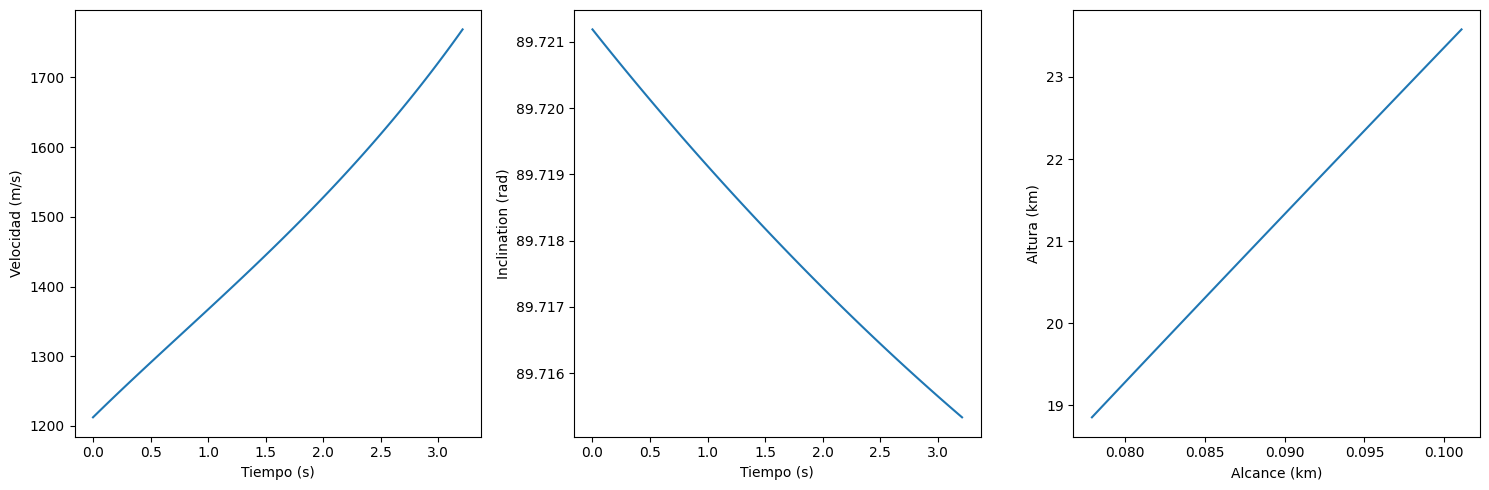

In [ ]:
Y0s = [solucion[:,0][-1], solucion[:,1][-1], solucion[:,2][-1],solucion[:,3][-1]]
ts = np.linspace(0, 1*tbo2[0], 100)
rad = 180/np.pi

solucion = odeint(ecuaciones_perfil_vuelo, Y0s, ts, args=(tbo2[0], m2[0], mf2[0] ))

fig, axs = plt.subplots(1,3,figsize=(15,5))

ax = axs[0]
ax.plot(ts,solucion[:,0])
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad (m/s)')

ax = axs[1]
ax.plot(ts,solucion[:,1]*rad)
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Inclination (rad)')

ax = axs[2]
ax.plot(solucion[:,3]/1e3,solucion[:,2]/1e3)
ax.set_xlabel('Alcance (km)')
ax.set_ylabel('Altura (km)')

fig.tight_layout()

##*Grafica: stage 3*

In [ ]:
#propiedades derivadas

T = 934e3 # N

mf3 = m3/n3
print(f'Masa en seco: {mf3} kg')

mb3 = m3 - mf3

print(f'Masa de combustible: {mb3} kg')

g0 = 9.82 # m/s^3

# Dado que T = b c
b3 = T/(c3*1e3)
print(f'Tasa de perdida de masa: {b3} kg/s')

# Tiempo de quemado
tbo3 = (m3 - mf3)/b3
print(f'Tiempo de quemado (burn-out): {tbo3} s = {tbo3/60} min')

Tmg3 = T/(m3*g0)
print(f'Razón empuje-peso: {Tmg3}')


# Valores en el burn-out
vbo3 = c3*1e3*np.log(m3/mf3) - g0*tbo3
hbo3 = c3*1e3/b3*(mf3*np.log(mf3/m3)+b3*tbo3)-1/2*g0*tbo3**2

# Pérdida por gravedad
delta_v_g3 = -g0*tbo3

print(f'Velocidad en el burn-out: {vbo3} m/s')
print(f'Delta V por gravedad: {delta_v_g3} m/s')
print(f'Altura en el burn-out: {hbo3} m')

Masa en seco: [96.3874646] kg
Masa de combustible: [39.2755115] kg
Tasa de perdida de masa: 317.36323479442746 kg/s
Tiempo de quemado (burn-out): [0.12375571] s = [0.0020626] min
Razón empuje-peso: [701.09044507]
Velocidad en el burn-out: [1004.69486534] m/s
Delta V por gravedad: [-1.21528104] m/s
Altura en el burn-out: [58.6294639] m


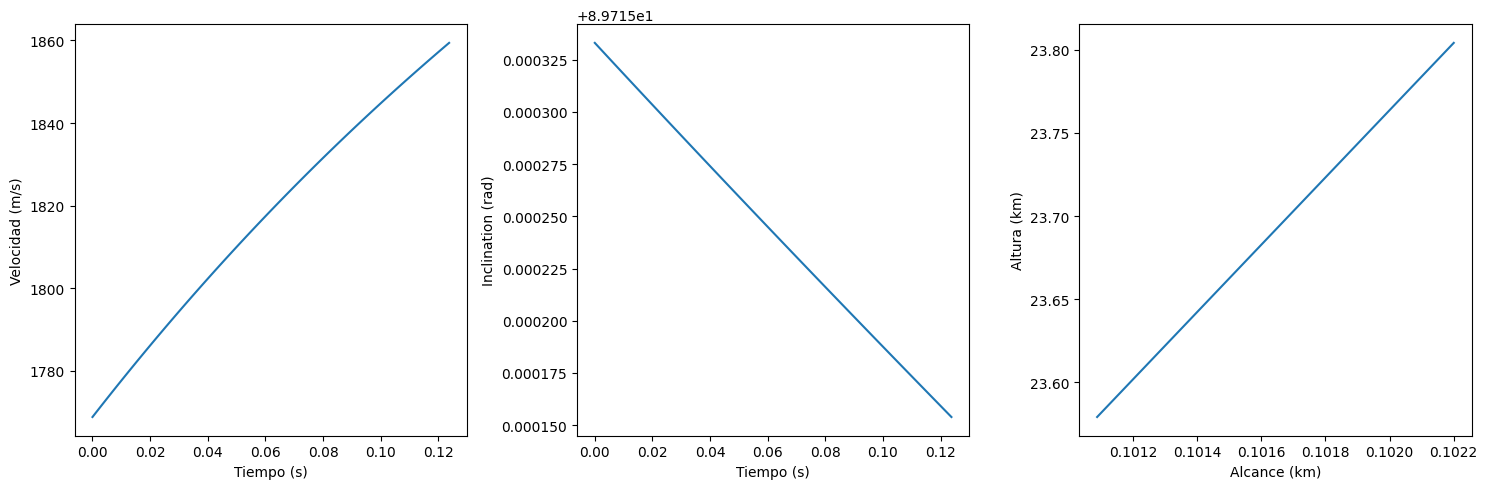

In [ ]:
Y0s = [solucion[:,0][-1], solucion[:,1][-1], solucion[:,2][-1],solucion[:,3][-1]]
ts = np.linspace(0, 1*tbo3[0], 100)
rad = 180/np.pi

solucion = odeint(ecuaciones_perfil_vuelo, Y0s, ts, args=(tbo3[0], m3[0], mf3[0] ))

fig, axs = plt.subplots(1,3,figsize=(15,5))

ax = axs[0]
ax.plot(ts,solucion[:,0])
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad (m/s)')

ax = axs[1]
ax.plot(ts,solucion[:,1]*rad)
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Inclination (rad)')

ax = axs[2]
ax.plot(solucion[:,3]/1e3,solucion[:,2]/1e3)
ax.set_xlabel('Alcance (km)')
ax.set_ylabel('Altura (km)')

fig.tight_layout()